In [1]:
import pandas as pd
import matplotlib.pyplot as plt
cols = ["title", "buckets","buckets_manual_1", "buckets_manual_2", "buckets_manual_3"]
df = pd.read_csv("./products_2023_Jan.csv", usecols=cols)


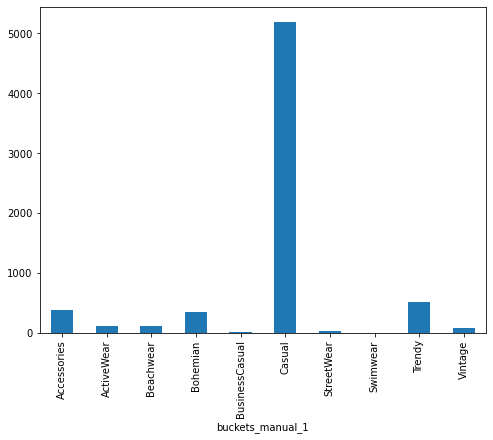

In [2]:
fig = plt.figure(figsize=(8,6))
df.groupby('buckets_manual_1').title.count().plot.bar(ylim=0)
plt.show()

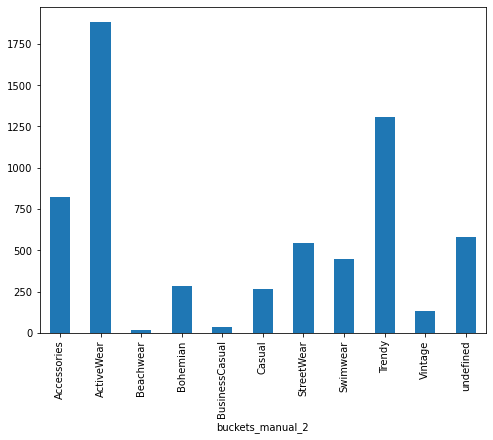

In [4]:
fig = plt.figure(figsize=(8,6))
df.groupby('buckets_manual_2').title.count().plot.bar(ylim=0)
plt.show()

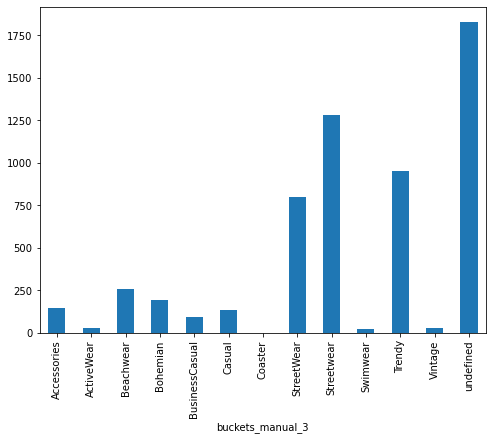

In [5]:
fig = plt.figure(figsize=(8,6))
df.groupby('buckets_manual_3').title.count().plot.bar(ylim=0)
plt.show()

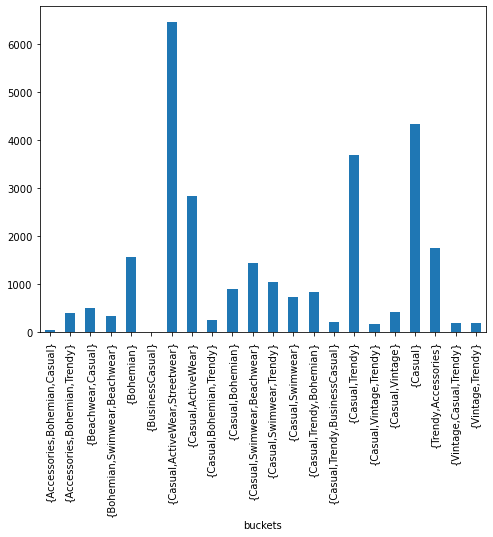

In [3]:
fig = plt.figure(figsize=(8,6))
df.groupby('buckets').title.count().plot.bar(ylim=0)
plt.show()

In [1]:
import pandas as pd
import sys
sys.path.append('../')
from tools import text_cleaner as tc 


In [27]:
df = pd.read_csv("./Result_4_fromDB_Apr_2023.csv")
for i in range (df.shape[0]):
    body_ht = df.loc[i]['body_html'] 
    title = df.loc[i]['title']
    description = tc.raw_content(title = title,  body_html=body_ht)
    df.loc[i,'description'] = description
    #or if we want to overwrite the 'body_html'
#df = df.rename(columns = {'body_html' : 'new_name'})
df = df.dropna(subset=['description'])
df.head()

,id,title,body_html,buckets,b1,b2,b3,description
0,6594509209683,RDS Monogram Chenille Sweatpants Black,RDS Monogram Chenille Sweatpants Black,"{Casual,ActiveWear,Streetwear}",Casual,ActiveWear,Streetwear,RDS Monogram Chenille Sweatpants Black. RDS Mo...
1,6653497213011,VOLCOM Iconic Stone Plus Fleece Pants Tie Dye,"<meta charset=""utf-8""><span data-mce-fragment=...","{Casual,ActiveWear,Streetwear}",Casual,ActiveWear,Streetwear,VOLCOM Iconic Stone Plus Fleece Pants Tie Dye....
2,6835629752403,BRIXTON Camp Alpha Tailored T-Shirt White,"<meta charset=""utf-8"">\n<p data-mce-fragment=""...","{Casual,ActiveWear,Streetwear}",Casual,Trendy,Streetwear,BRIXTON Camp Alpha Tailored T Shirt White. The...
3,11203129236,Emerson Boyfriend - Distressed Rock On,<p><span>The Emerson is the slimmest version o...,"{Casual,Trendy}",Casual,Trendy,undefined,Emerson Boyfriend Distressed Rock On. The Emer...
4,4170816520286,Heel cover zigzag,<p>heel cover zigzag</p>,"{Casual,Trendy}",Casual,undefined,undefined,Heel cover zigzag. heel cover zigzag


In [28]:
df = df.drop('body_html', axis=1)

In [29]:
df.to_csv("temp.csv", index=True)